### Nama : Maya Agustina
### NIM : 2209106005
### Kelas : Informatika A

## Posttest 6 Kecerdasan Buatan

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

### Membaca dataset

In [8]:

df = pd.read_csv("diamonds.csv")


## Preprocessing dataset
### Mengkodekan kolom kategorikal dengan one-hot encoding

In [9]:
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

### Normalisasi fitur-fitur numerik

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['carat', 'depth', 'table', "'x'", "'y'", "'z'", 'price']] = scaler.fit_transform(
    df[['carat', 'depth', 'table', "'x'", "'y'", "'z'", 'price']])

### Split dataset menjadi train dan test

In [12]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Membangun model Sequential

In [13]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer untuk regresi, ganti activation dengan 'linear'

### Compile model

In [14]:

model.compile(optimizer='adam', loss='mean_squared_error')  # Loss function untuk regresi

### Pelatihan model

In [15]:

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1349/1349 [==============================] - 16s 7ms/step - loss: 0.0700 - val_loss: 0.0350
Epoch 2/10
1349/1349 [==============================] - 9s 7ms/step - loss: 0.0338 - val_loss: 0.0259
Epoch 3/10
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0267 - val_loss: 0.0232
Epoch 4/10
1349/1349 [==============================] - 9s 6ms/step - loss: 0.0263 - val_loss: 0.0215
Epoch 5/10
1349/1349 [==============================] - 7s 6ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 6/10
1349/1349 [==============================] - 7s 6ms/step - loss: 0.0226 - val_loss: 0.0201
Epoch 7/10
1349/1349 [==============================] - 11s 8ms/step - loss: 0.0212 - val_loss: 0.0203
Epoch 8/10
1349/1349 [==============================] - 11s 9ms/step - loss: 0.0213 - val_loss: 0.0200
Epoch 9/10
1349/1349 [==============================] - 8s 6ms/step - loss: 0.0216 - val_loss: 0.0217
Epoch 10/10
1349/1349 [==============================] - 8s 6ms/step - loss: 0.

### Evaluasi model

In [16]:
y_pred = model.predict(X_test)
if len(y_test.shape) > 1:
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi: {accuracy}')
else:
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared (R2): {r2}')

338/338 [==============================] - 5s 7ms/step
R-squared (R2): 0.979557919912224


### Mengecek nama metrik

In [24]:
print(history.history.keys())


dict_keys(['loss', 'val_loss'])


### Proses menampilkan Grafik

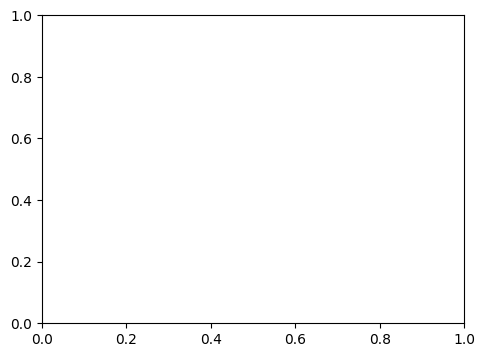

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

if 'accuracy' in history.history:
    train_acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
else:
    train_acc_key = 'loss'
    val_acc_key = 'val_loss'

### Menampilkan Grafik

C:\Users\ACER-GK\AppData\Local\Temp\ipykernel_2060\2518592915.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


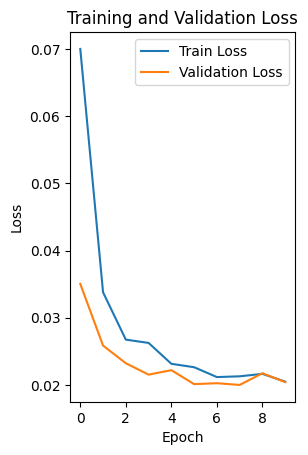

In [29]:
plt.plot(history.history[train_acc_key], label='Train Accuracy')
plt.plot(history.history[val_acc_key], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()